In [1]:
import numpy as np
from PIL import Image

from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input, decode_predictions

Using TensorFlow backend.


# Fetching a pretrained model in Keras


In [2]:
model = VGG16(weights='imagenet', include_top=True)

In [3]:
#Let's take a look at the model
layers = dict([(layer.name, layer.output) for layer in model.layers])
layers

{'block1_conv1': <tf.Tensor 'block1_conv1/Relu:0' shape=(?, 224, 224, 64) dtype=float32>,
 'block1_conv2': <tf.Tensor 'block1_conv2/Relu:0' shape=(?, 224, 224, 64) dtype=float32>,
 'block1_pool': <tf.Tensor 'block1_pool/MaxPool:0' shape=(?, 112, 112, 64) dtype=float32>,
 'block2_conv1': <tf.Tensor 'block2_conv1/Relu:0' shape=(?, 112, 112, 128) dtype=float32>,
 'block2_conv2': <tf.Tensor 'block2_conv2/Relu:0' shape=(?, 112, 112, 128) dtype=float32>,
 'block2_pool': <tf.Tensor 'block2_pool/MaxPool:0' shape=(?, 56, 56, 128) dtype=float32>,
 'block3_conv1': <tf.Tensor 'block3_conv1/Relu:0' shape=(?, 56, 56, 256) dtype=float32>,
 'block3_conv2': <tf.Tensor 'block3_conv2/Relu:0' shape=(?, 56, 56, 256) dtype=float32>,
 'block3_conv3': <tf.Tensor 'block3_conv3/Relu:0' shape=(?, 56, 56, 256) dtype=float32>,
 'block3_pool': <tf.Tensor 'block3_pool/MaxPool:0' shape=(?, 28, 28, 256) dtype=float32>,
 'block4_conv1': <tf.Tensor 'block4_conv1/Relu:0' shape=(?, 28, 28, 512) dtype=float32>,
 'block4_co

This gives a basic idea of the model, self note, the first block accepts ( 224 by 224 pixel images)

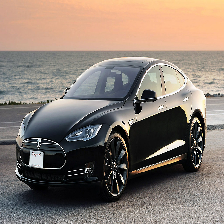

In [5]:
# okay lets see how smart this VGG16 is... we will download a picture from the web,...maybe a tesla
image_path = 'tesla.jpg'
image = Image.open(image_path)
#lets resize the image
image = image.resize((224, 224))
image

So here is our tesla, but this cnn network should atleast identify it as a car

In [7]:
# Convert it into an array
x = np.asarray(image, dtype='float32')
# Convert it into a list of arrays
x = np.expand_dims(x, axis=0)
# Pre-process the input to match the training data
x = preprocess_input(x)
x.shape

(1, 224, 224, 3)

# 